<a href="https://colab.research.google.com/github/ThanuVijay/sentimental-analysis-NLP/blob/main/Natural_Language_Processing_on_sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
!pip install wordcloud

In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


#NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Wordcloud
from wordcloud import wordcloud

nltk.download('stopwords')
nltk.download('wordnet')

#sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from scikitplot.metrics import plot_confusion_matrix

# Import Dataset

Link: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?select=train.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/dataset/train.txt', delimiter=';', names=['text','label'])
df_val = pd.read_csv('/content/drive/MyDrive/dataset/val.txt' , delimiter=';', names=['text','label'])

In [ ]:
df_train

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
df_val

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [ ]:
df=pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)

In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.tail()

,text,label
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy
17999,i feel like i just wanna buy any cute make up ...,joy


In [ ]:
df.shape

(18000, 2)

In [ ]:
df.sample(5)

,text,label
12852,i feel slightly naughty holding this cd seeing...,love
11679,i did not however feel like the teachers guide...,joy
9253,i feel like i have gone for broke,sadness
5326,i feel like i should try to calm her down shes...,joy
10909,i will not respond i am not trying to trap any...,sadness


In [ ]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
df.label.value_counts()

joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: label, dtype: int64

<Axes: >

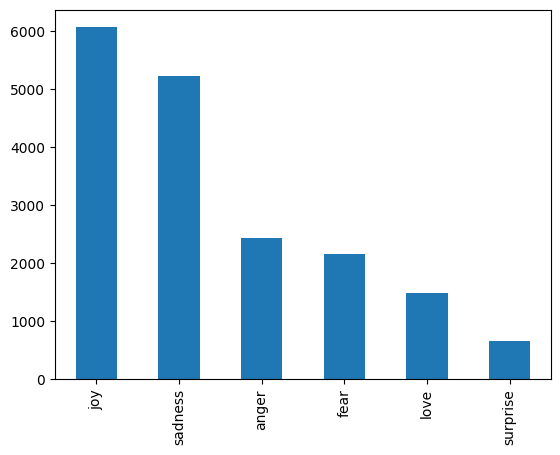

In [ ]:
df.label.value_counts().plot.bar()

In [ ]:
#positive sentiments = joy, love , suprise = 1
#negetive sentiments = anger, sadness , fear = 0

In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df['label'].replace(to_replace=['surprise','joy','love'], value=1, inplace=True)
df['label'].replace(to_replace=['anger','sadness','fear'], value=0, inplace=True)

In [ ]:
df.head(30)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,1
7,i feel as confused about life as a teenager or...,0
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,1


In [ ]:
df.label.value_counts()

0    9799
1    8201
Name: label, dtype: int64

<Axes: >

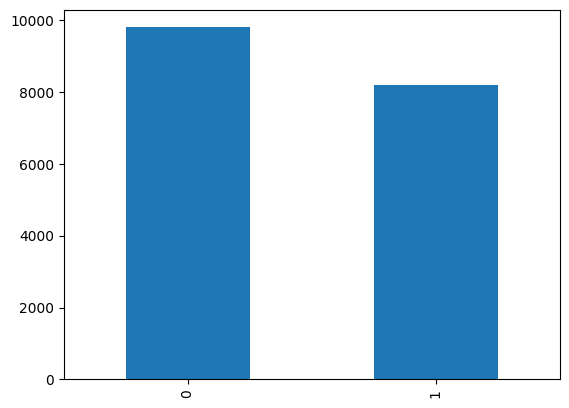

In [ ]:
df.label.value_counts().plot.bar()

In [ ]:
lm = WordNetLemmatizer()

In [ ]:
def transformation(df_column):
  output = []
  for i in df_column:
    new_text = re.sub('[^a-zA-Z]',' ',str(i))
    new_text = new_text.lower()
    new_text = new_text.split()
    new_text = [lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
    output.append(' '.join(str(k) for k in new_text))

  return output



In [ ]:
var = transformation(df.text)

In [ ]:
var

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

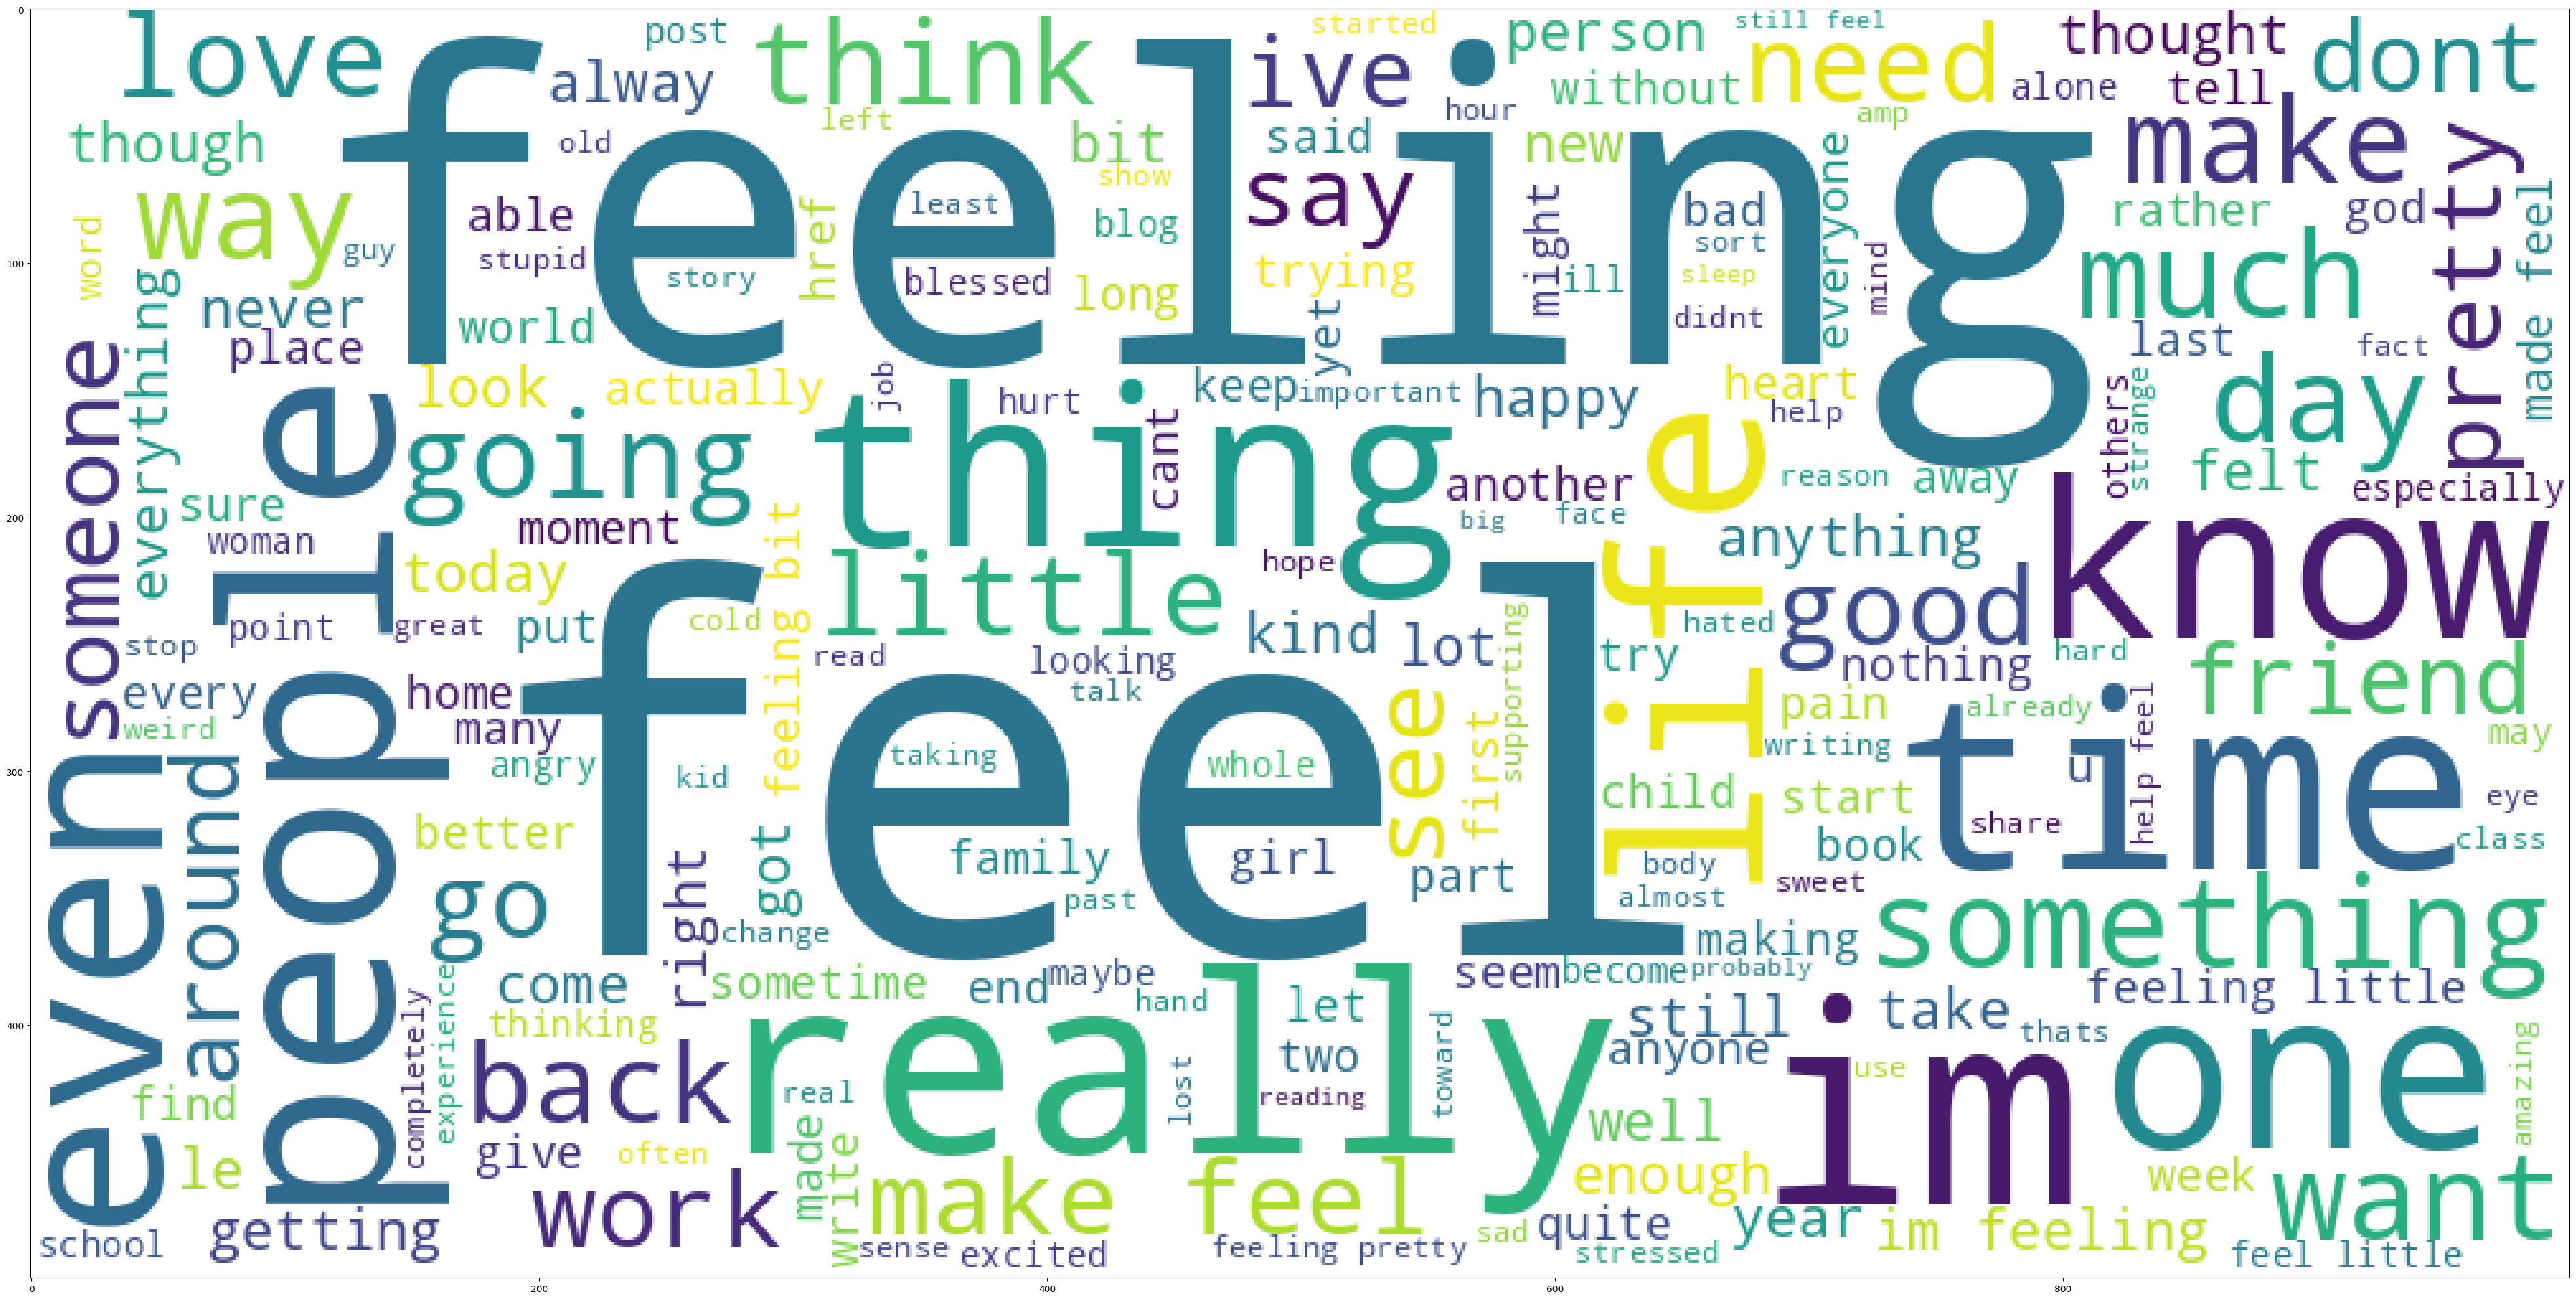

In [ ]:
#word cloud
plt.figure(figsize=(50,28))
word = ''
for i in var:
  for j in i:
    word += " ".join(j)

wc = WordCloud(width=1000, height= 500, background_color='white', min_font_size=10).generate(word)
plt.imshow(wc)

In [ ]:
word

'didnt feel humiliatedgo feeling hopeless damned hopeful around someone care awakeim grabbing minute post feel greedy wrongever feeling nostalgic fireplace know still propertyfeeling grouchyive feeling little burdened lately wasnt sureive taking milligram time recommended amount ive fallen asleep lot faster also feel like funnyfeel confused life teenager jaded year old manpetronas year feel petronas performed well made huge profitfeel romanticfeel like make suffering seeing mean somethingfeel running divine experience expect type spiritual encounterthink easiest time year feel dissatisfiedfeel low energy thirstyimmense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little preciousfeel reassured anxiety sidedidnt really feel embarrassedfeel pretty pathetic timestarted feeling sentimental doll child began collection vintage barbie doll sixtyfeel compromised skeptical value every unit work putfeel irritated rej

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width=1000, height= 500, background_color='white', min_font_size=10).generate(word)

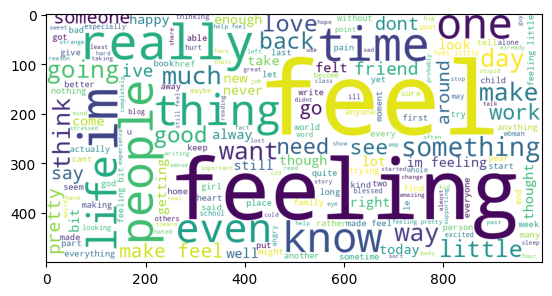

In [ ]:
plt.imshow(wc)

In [ ]:
# Bag of words (BOW)

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(var)
x_train = traindata
y_train = df.label

In [ ]:
y_train

0        0
1        0
2        0
3        1
4        0
        ..
17995    0
17996    1
17997    1
17998    1
17999    1
Name: label, Length: 18000, dtype: int64

In [ ]:
model = RandomForestClassifier()

In [ ]:
from tables.file import parameters
#hyper parameter tuning

parameters = {'max_features':('auto','sqrt'),
              'n_estimators':[500,1000,1500],
              'max_depth':[5,10, None],
              'min_samples_leaf':[ 1, 2, 5, 10],
              'min_samples_split':[5,10,15],
              'bootstrap':[True, False]}

In [ ]:
parameters

{'max_features': ('auto', 'sqrt'),
 'n_estimators': [500, 1000, 1500],
 'max_depth': [5, 10, None],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [5, 10, 15],
 'bootstrap': [True, False]}

In [ ]:
grid_search = GridSearchCV(model,
                           parameters,
                           cv=5,
                           return_train_score = True,
                           n_jobs=1)

In [ ]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

KeyboardInterrupt: ignored

In [ ]:
grid_search.best_params_

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                             n_estimators=grid_search.best_params_['n_estimators'],
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             bootstrap=grid_search.best_params_['bootstrap'])

In [ ]:
rfc.fit(x_train, y_train)

In [ ]:
test_data =
x_test, y_test

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
#model evaluation
accuracy_score(y_test, y_pred)

In [ ]:
def sentimental_analysis(input):
  new_input = transformation(input)
  transformed_input = cv.transform(new_input)
  prediction = rfc.predict(transformed_input)
  if prediction == 0:
    print("Negetive Sentiment")
  elif prediction == 1:
    print("Positive Sentiment")
  else
    print("Invalid Sentiment")

In [ ]:
input = "Today i was playing in the park and i fell"
inp = input("")

In [ ]:
sentimental_analysis(inp)